# I . IMPORTS

In [39]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings 
warnings.filterwarnings('ignore')

# II . LOAD DATA

1- importer le fichier de données

In [40]:
import pandas as pd

df = pd.read_csv('dataset_churn_reorganise.csv', sep=';', encoding='latin1')


# III . DATA DESCRIPTION

In [41]:
print(df.head())

   Age  Ancienneté Type_abonnement  Facture_moy  Nb_plaintes  Satisfaction  \
0   78          61        Postpayé        78.00            2             5   
1   55          19         Prépayé        77.06            6             4   
2   51          13         Prépayé       319.02            9             2   
3   30          37         Prépayé       171.76            9             2   
4   42           6         Prépayé        91.88            8             3   

   Satisfaction_Macro_Tunisie  Taux_Churn_National_Estime  Résiliation  
0                    4.366667                       0.035            0  
1                    4.366667                       0.035            0  
2                    4.366667                       0.035            1  
3                    4.366667                       0.035            0  
4                    4.366667                       0.035            0  


In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Ancienneté                  500 non-null    int64  
 2   Type_abonnement             500 non-null    object 
 3   Facture_moy                 500 non-null    float64
 4   Nb_plaintes                 500 non-null    int64  
 5   Satisfaction                500 non-null    int64  
 6   Satisfaction_Macro_Tunisie  500 non-null    float64
 7   Taux_Churn_National_Estime  500 non-null    float64
 8   Résiliation                 500 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 35.3+ KB
None


In [43]:
print(df.describe())

              Age  Ancienneté  Facture_moy  Nb_plaintes  Satisfaction  \
count  500.000000  500.000000   500.000000    500.00000    500.000000   
mean    43.424000   33.766000   201.203520      5.55200      3.684000   
std     16.676463   24.343386    91.150145      2.68882      0.980851   
min     18.000000    1.000000    58.810000      0.00000      2.000000   
25%     30.000000   11.000000   123.042500      4.00000      3.000000   
50%     42.000000   31.000000   219.880000      6.00000      4.000000   
75%     56.000000   57.000000   280.097500      8.00000      4.000000   
max     80.000000   72.000000   366.600000     10.00000      5.000000   

       Satisfaction_Macro_Tunisie  Taux_Churn_National_Estime  Résiliation  
count                5.000000e+02                5.000000e+02   500.000000  
mean                 4.366667e+00                3.500000e-02     0.264000  
std                  8.890679e-16                1.389169e-17     0.441241  
min                  4.366667e+00 

In [44]:
df.columns


Index(['Age', 'Ancienneté', 'Type_abonnement', 'Facture_moy', 'Nb_plaintes',
       'Satisfaction', 'Satisfaction_Macro_Tunisie',
       'Taux_Churn_National_Estime', 'Résiliation'],
      dtype='object')

In [45]:
duplicates = df[df.duplicated()]
len(duplicates)

0

## 1. Data Dimension

In [46]:
print("=== INFORMATIONS SUR LES DIMENSIONS ===")
print(f"Shape : {df.shape}")
print(f"Lignes : {df.shape[0]}")
print(f"Colonnes : {df.shape[1]}")

=== INFORMATIONS SUR LES DIMENSIONS ===
Shape : (500, 9)
Lignes : 500
Colonnes : 9


##  3. Check NaN

In [47]:
print("=== VÉRIFICATION RAPIDE DES VALEURS MANQUANTES ===")
print(f"Valeurs manquantes totales : {df.isnull().sum().sum()}")

=== VÉRIFICATION RAPIDE DES VALEURS MANQUANTES ===
Valeurs manquantes totales : 0


# IV. Visualisation and cleaning data

1 - Afficher quelque boîtes à moustaches (boxplot) 

In [48]:
print(df.columns)


Index(['Age', 'Ancienneté', 'Type_abonnement', 'Facture_moy', 'Nb_plaintes',
       'Satisfaction', 'Satisfaction_Macro_Tunisie',
       'Taux_Churn_National_Estime', 'Résiliation'],
      dtype='object')


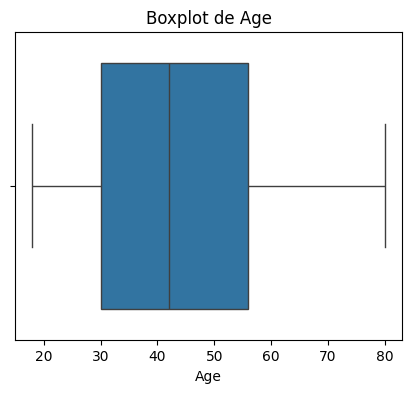

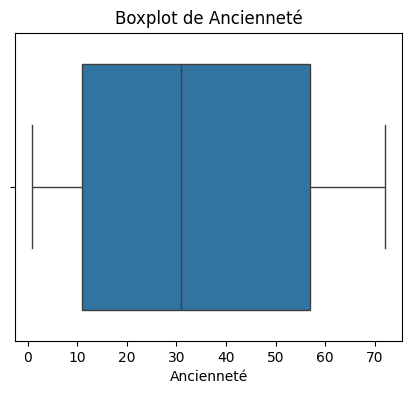

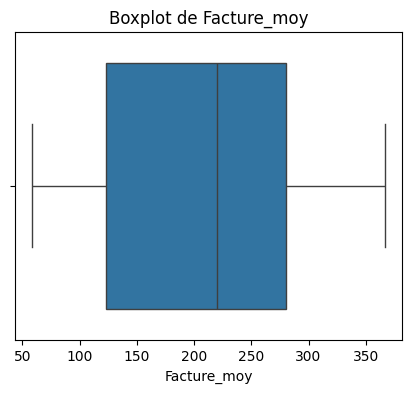

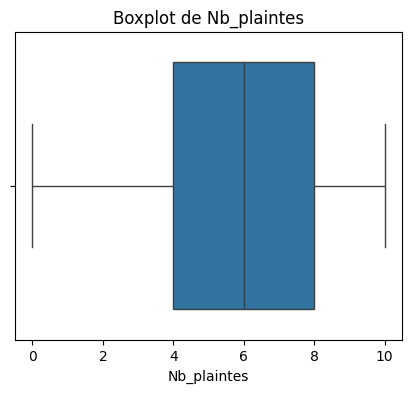

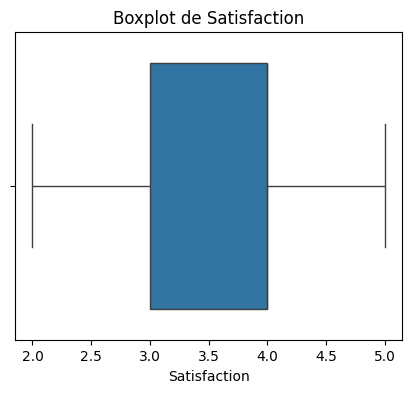

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

colonnes_a_tester = ['Age', 'Ancienneté', 'Facture_moy', 'Nb_plaintes', 'Satisfaction']

for col in colonnes_a_tester:
    plt.figure(figsize=(5, 4))  # taille de la figure pour chaque boxplot
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


# VI. Les variables en entrée X et la cible Y

2 - affecter à Y (cible) la dernière colonne et le reste du dataframe au entrées X

In [50]:
Y = df.iloc[:, -1]

X = df.iloc[:, :-1]


3 - afficher un echontillion de X et Y

In [51]:
print("Échantillon de X :")
print(X.head())

print("\nÉchantillon de Y :")
print(Y.head())


Échantillon de X :
   Age  Ancienneté Type_abonnement  Facture_moy  Nb_plaintes  Satisfaction  \
0   78          61        Postpayé        78.00            2             5   
1   55          19         Prépayé        77.06            6             4   
2   51          13         Prépayé       319.02            9             2   
3   30          37         Prépayé       171.76            9             2   
4   42           6         Prépayé        91.88            8             3   

   Satisfaction_Macro_Tunisie  Taux_Churn_National_Estime  
0                    4.366667                       0.035  
1                    4.366667                       0.035  
2                    4.366667                       0.035  
3                    4.366667                       0.035  
4                    4.366667                       0.035  

Échantillon de Y :
0    0
1    0
2    1
3    0
4    0
Name: Résiliation, dtype: int64


In [54]:
print(df.columns)


Index(['Age', 'Ancienneté', 'Type_abonnement', 'Facture_moy', 'Nb_plaintes',
       'Satisfaction', 'Satisfaction_Macro_Tunisie',
       'Taux_Churn_National_Estime', 'Résiliation'],
      dtype='object')


In [53]:
from sklearn.preprocessing import LabelEncoder

# Supposons que X est ton DataFrame de features

colonnes_categorielles = ['Type_abonnement']  
label_encoder = LabelEncoder()

for colonne in colonnes_categorielles:
    if colonne in X.columns:
        X[colonne] = label_encoder.fit_transform(X[colonne])
        
        mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        print(f"{colonne}: {mapping}")



Type_abonnement: {'Postpayé': np.int64(0), 'Prépayé': np.int64(1)}


## VI.1 Transformer X et Y en tableau numpy

1 - lancer les commandes qui transforme X et Y en type numpyarray

In [55]:
X_numpy = np.array(X)
Y_numpy = np.array(Y)

2 - Vérifier le type et le contenu de X et Y

In [56]:
print("Type de X_numpy :", type(X_numpy))
print("Type de Y_numpy :", type(Y_numpy))

Type de X_numpy : <class 'numpy.ndarray'>
Type de Y_numpy : <class 'numpy.ndarray'>


# VIII. Splitting dataset into train and test sets

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0
)

In [59]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (400, 8)
X_test shape: (100, 8)


# IX. Mise à l'echelle des variables

1- Nous allons faire une standardisation du X_train et X_test

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_train_sc_df = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)

2 - Afficher un echantillon du X_train_sc

In [61]:
pd.DataFrame(X_train_sc).head()

,0,1,2,3,4,5,6,7
0,-0.350926,0.183451,-1.020204,-0.476491,-1.364205,1.364955,0.0,-6.938894e-18
1,-0.231715,0.753237,-1.020204,-1.463942,0.507132,-0.664718,0.0,-6.938894e-18
2,-0.172110,1.526519,-1.020204,-1.494609,-0.241403,0.350119,0.0,-6.938894e-18
3,-0.827767,-1.363112,0.980196,-0.517416,1.629935,-1.679554,0.0,-6.938894e-18
4,1.496835,0.712538,-1.020204,0.580698,-0.241403,0.350119,0.0,-6.938894e-18


In [62]:
print(df.columns)


Index(['Age', 'Ancienneté', 'Type_abonnement', 'Facture_moy', 'Nb_plaintes',
       'Satisfaction', 'Satisfaction_Macro_Tunisie',
       'Taux_Churn_National_Estime', 'Résiliation'],
      dtype='object')


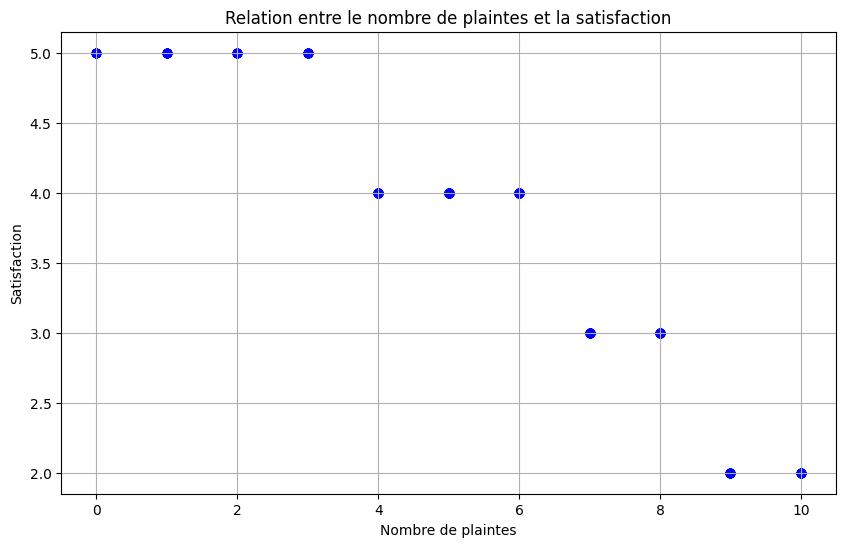

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Nb_plaintes'], df['Satisfaction'], color='b', alpha=0.5)
plt.title('Relation entre le nombre de plaintes et la satisfaction')
plt.xlabel('Nombre de plaintes')
plt.ylabel('Satisfaction')
plt.grid(True)
plt.show()


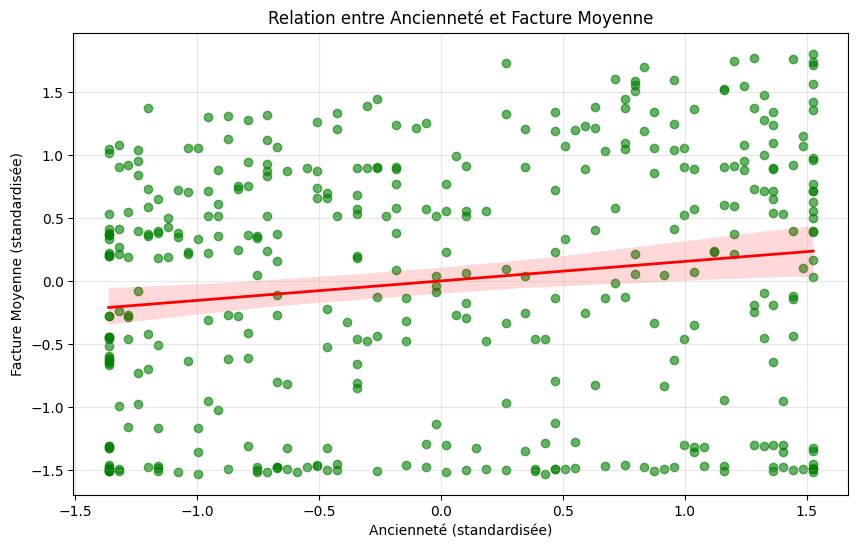

In [73]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Ancienneté',
    y='Facture_moy',
    data=X_train_sc_df,
    scatter_kws={'alpha': 0.6, 'color':'green'},
    line_kws={'color':'red', 'linewidth':2}
)
plt.xlabel('Ancienneté (standardisée)')
plt.ylabel('Facture Moyenne (standardisée)')
plt.title('Relation entre Ancienneté et Facture Moyenne')
plt.grid(True, alpha=0.3)
plt.show()


In [74]:
correlation = df['Ancienneté'].corr(df['Facture_moy'])
print(f"Le coefficient de corrélation entre l'ancienneté et la facteur moyenne est : {correlation}")

Le coefficient de corrélation entre l'ancienneté et la facteur moyenne est : 0.15842424582133977


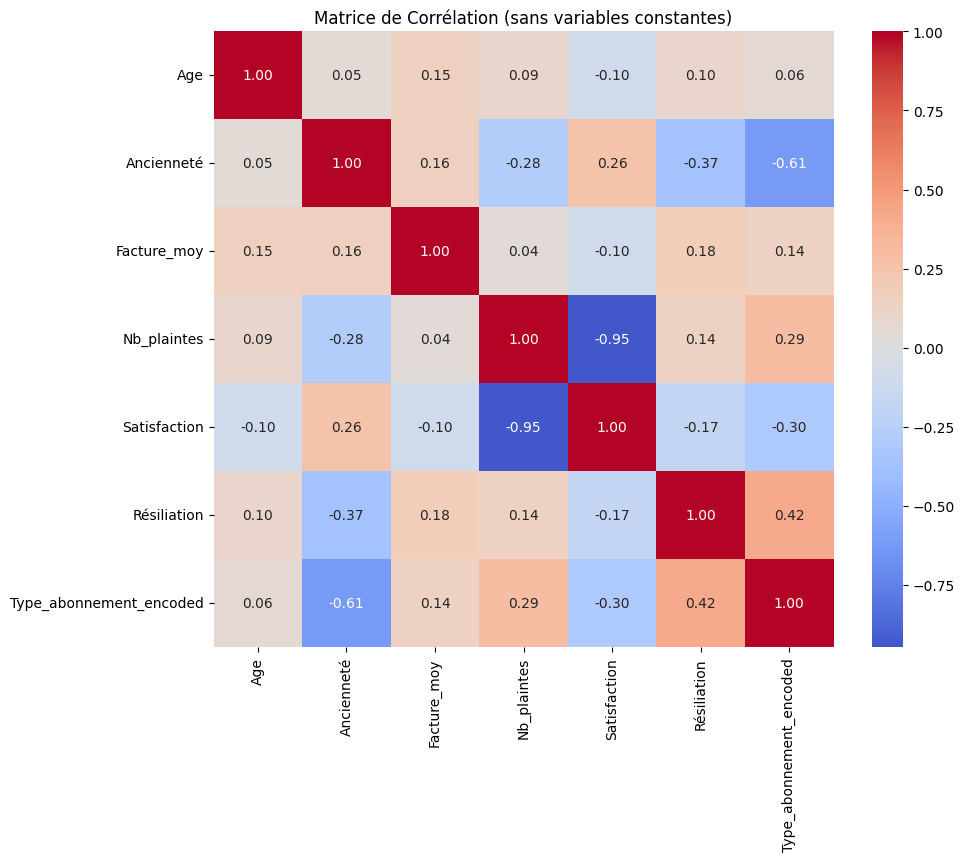

In [76]:

correlations = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation (sans variables constantes)')
plt.show()

# X. Modélisation avec Régression

Choix des modèles et métriques :  

(1) Si dataset simple avec peu de features :  
Modèle : LinearRegression ou Ridge  
Métriques : MAE et RMSE  

(2) Si données non linéaires :  
Modèle : RandomForestRegressor, GradientBoostingRegressor, ou XGBoost  
Métriques : R² et RMSE  

(3) Si données volumineuses et complexes :  
Modèle : Réseaux de neurones (par ex., TensorFlow/Keras)  
Métriques : MAE, MSE, ou RMSE.  

(4) Si outliers présents :  
Modèle : RandomForestRegressor ou HuberRegressor  
Métrique : MedAE ou Log-Cosh.  

## X.1 -  Régression linéaire

In [79]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
regressor = LinearRegression()
regressor.fit(X_train_sc, Y_train)

Y_pred = regressor.predict(X_test_sc)


In [80]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
model_lr = LinearRegression()
model_lr.fit(X_train_sc, Y_train)

Y_pred_lr = model_lr.predict(X_test_sc)
mae_lr = mean_absolute_error(Y_test, Y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))

print("LinearRegression - MAE:", mae_lr)
print("LinearRegression - RMSE:", rmse_lr)

LinearRegression - MAE: 0.3344687934588731
LinearRegression - RMSE: 0.3901778218991649


### Evaluation

## X.2 -  Régression Ridge/Lasso (avec régularisation)

In [82]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_sc, Y_train)
Y_pred_ridge = ridge_model.predict(X_test_sc)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_sc, Y_train)
Y_pred_lasso = lasso_model.predict(X_test_sc)


from sklearn.metrics import r2_score
print("Ridge - R2:", r2_score(Y_test, Y_pred_ridge))
print("Lasso - R2:", r2_score(Y_test, Y_pred_lasso))

Ridge - R2: 0.1657594956120103
Lasso - R2: 0.16709401375824195


## X.4. ElasticNet

In [83]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train_sc, Y_train)
Y_pred_elastic = elastic_model.predict(X_test_sc)
rmse_elastic = np.sqrt(mean_squared_error(Y_test, Y_pred_elastic))
print("ElasticNet - RMSE:", rmse_elastic)


ElasticNet - RMSE: 0.39061474281052294


## X.3 -  Régression polynomiale 

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_sc)
X_test_poly = poly.transform(X_test_sc)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
Y_pred_poly = poly_model.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(Y_test, Y_pred_poly))
print("Polynomial Regression - RMSE:", rmse_poly)


Polynomial Regression - RMSE: 0.39409950721748754


## X.4 -  DecisionTreeRegressor

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

tree_model = DecisionTreeRegressor(random_state=0)

tree_model.fit(X_train_sc, Y_train)

Y_pred_tree = tree_model.predict(X_test_sc)

rmse_tree = np.sqrt(mean_squared_error(Y_test, Y_pred_tree))
print("Decision Tree Regressor - RMSE:", rmse_tree)


Decision Tree Regressor - RMSE: 0.5744562646538028


## X.5. RandomForestRegressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(X_train_sc, Y_train)
Y_pred_rf = model_rf.predict(X_test_sc)

r2 = r2_score(Y_test, Y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print("RandomForestRegressor - R2:", r2)
print("RandomForestRegressor - RMSE:", rmse_rf)


RandomForestRegressor - R2: 0.10815241228070172
RandomForestRegressor - RMSE: 0.40332741042483095


## X.6. GradientBoostingRegressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
gbr_model = GradientBoostingRegressor(
    n_estimators=100,   
    learning_rate=0.1,  
    max_depth=3,        
    random_state=0
)

gbr_model.fit(X_train_sc, Y_train)
Y_pred_gbr = gbr_model.predict(X_test_sc)
rmse_gbr = np.sqrt(mean_squared_error(Y_test, Y_pred_gbr))
print("Gradient Boosting Regressor - RMSE:", rmse_gbr)


Gradient Boosting Regressor - RMSE: 0.41410077550658936


## X.7. GridSearch GradientBoostingRegressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

gbr = GradientBoostingRegressor(random_state=0)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3]
}
grid = GridSearchCV(gbr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train_sc, Y_train)
best_gbr = grid.best_estimator_
Y_pred = best_gbr.predict(X_test_sc)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(grid.best_params_)
print(rmse)


{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
0.3856492066312652


## X.8. XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X_train_np = np.array(X_train_sc)
X_test_np = np.array(X_test_sc)
Y_train_np = np.array(Y_train)
Y_test_np = np.array(Y_test)

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
xgb_model.fit(X_train_np, Y_train_np)
Y_pred = xgb_model.predict(X_test_np)
rmse = np.sqrt(mean_squared_error(Y_test_np, Y_pred))
print("rmse:",rmse)

rmse: 0.4186590145674999


## X.9. LightGBM

In [93]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
lgb_model.fit(X_train_sc, Y_train)
Y_pred = lgb_model.predict(X_test_sc)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse",rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 274
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 6
[LightGBM] [Info] Start training from score 0.270000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

n_estimators: Number of boosting iterations.  
learning_rate: Shrinks contribution of each tree to prevent overfitting.  
max_depth: Controls the depth of each tree; use -1 for no limit.  
feature_importances_: Provides a measure of the contribution of each feature.  

## X.10. CatBoost

In [ ]:
#pip install catboost

iterations: Number of trees to build.  
learning_rate: Determines the contribution of each tree.  
depth: Depth of the trees, affecting the model\'s complexity.  
feature_importances_: Provides a ranking of feature importance.  

In [96]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

cat_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=3, verbose=0, random_state=0)
cat_model.fit(X_train_sc, Y_train)
Y_pred = cat_model.predict(X_test_sc)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse",rmse)

rmse 0.43364038066727245


## X.11. SVM

In [97]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_sc, Y_train)
Y_pred = svr_model.predict(X_test_sc)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse",rmse)

rmse 0.4709423239696507


## X.12. K-Nearest Neighbors Regressor (KNN)

In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=5)  # nombre de voisins = 5
knn_model.fit(X_train_sc, Y_train)
Y_pred = knn_model.predict(X_test_sc)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse",rmse)

rmse 0.4079215610874228
